# Build the Vision Transformer Model from scratch.
### Use the research paper as referencing material and replicating all concept required for developing intution of the each and every concept and mathematical equation related to it.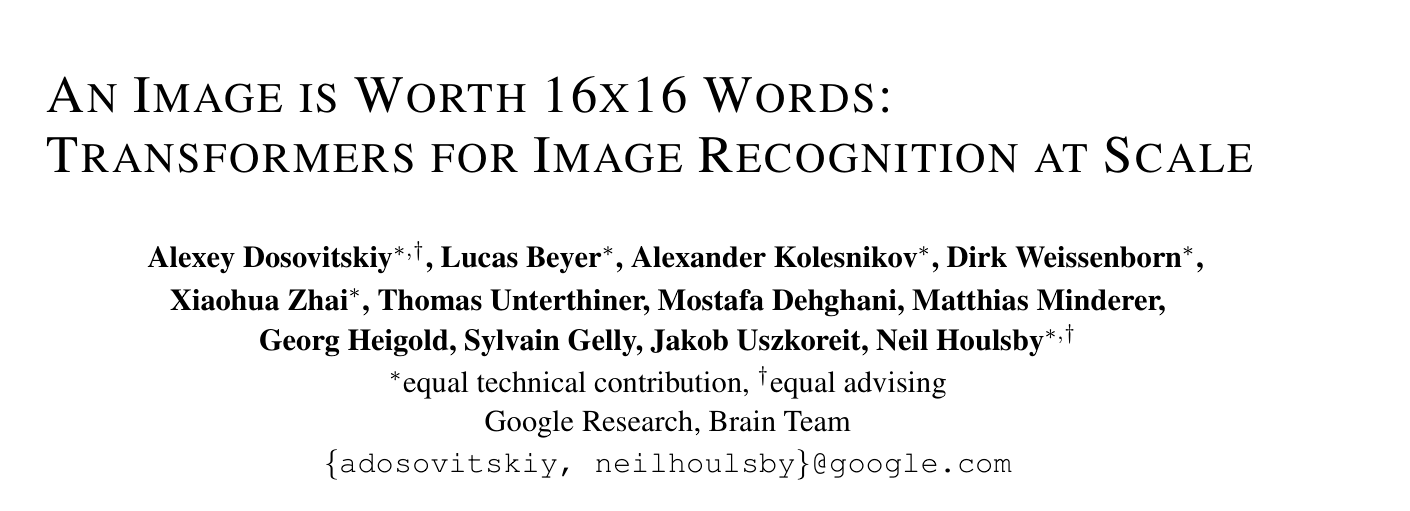


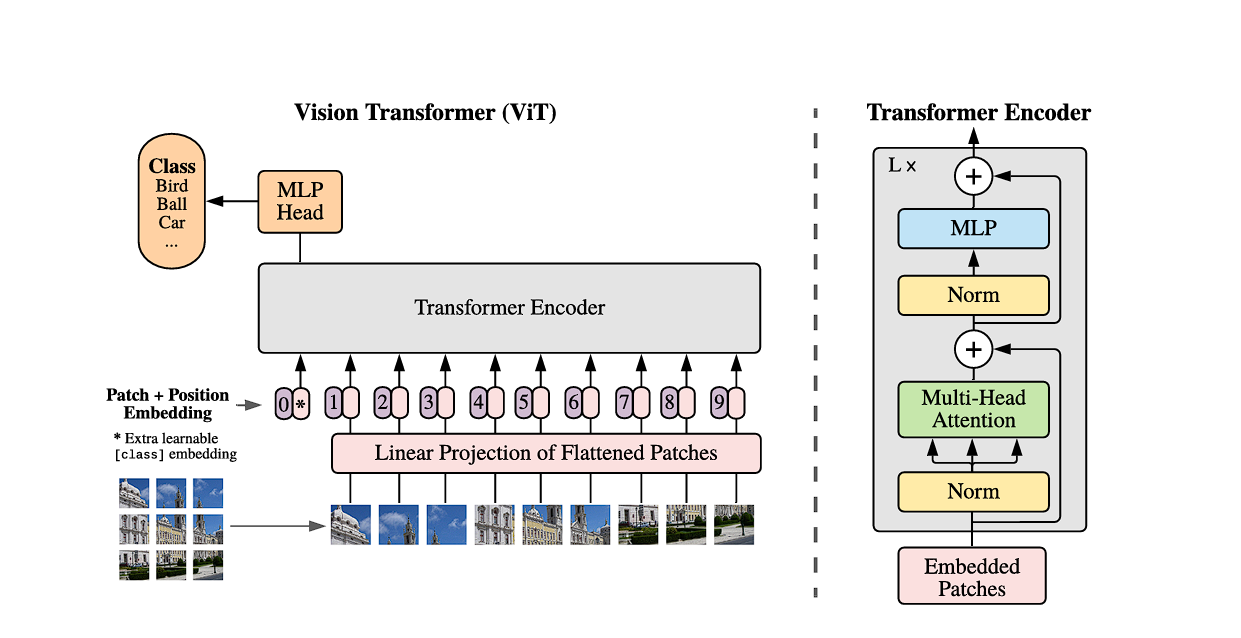



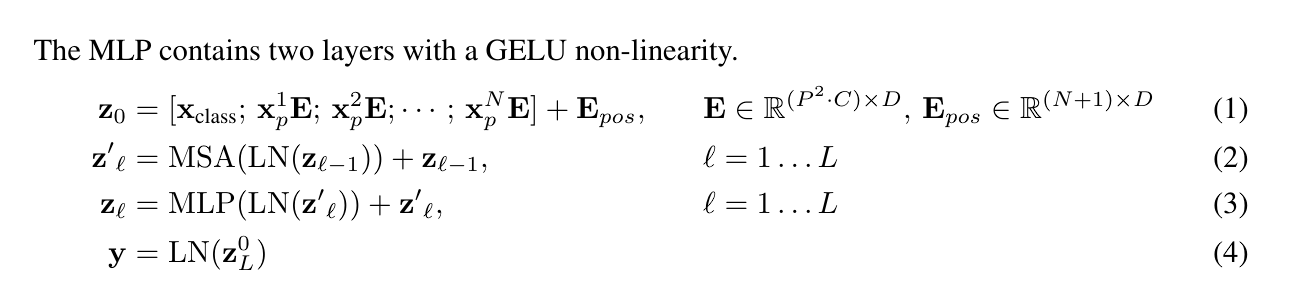

In [ ]:
"""
Dataset -> Imagenet , CIFAR-100 , VTAB etc...
Introductin
self-attention-based architecture
try to train the model on 100B parameters
ResNet like architecture are still state of the art
Images -> patches -> linear embedding on each patches -> Add position embedding.
Try to train on 14M-300M images to improved model effeciancies
ImageNet-> 88.55%
ImageNet-Real -> 90.72%
CIFAR-100 -> 77.63%
Reshape -> [height , width , colour channel] -> N * (p^2 * C)
Position embedding are added to the patch embedding to retain positional information.
Dataset
ILSVRC-2012 ImageNet dataset with 1k classes and 1.3M images
It is the subset of the ImageNet-21k with 21k classes and 14M images
Training and fine tuning model.

"""

'\nDataset -> Imagenet , CIFAR-100 , VTAB etc...\nIntroductin\nself-attention-based architecture\ntry to train the model on 100B parameters\nResNet like architecture are still state of the art\nImages -> patches -> linear embedding on each patches -> Add position embedding.\nTry to train on 14M-300M images to improved model effeciancies\nImageNet-> 88.55%\nImageNet-Real -> 90.72%\nCIFAR-100 -> 77.63%\nReshape -> [height , width , colour channel] -> N * (p^2 * C)\nPosition embedding are added to the patch embedding to retain positional information.\nDataset\nILSVRC-2012 ImageNet dataset with 1k classes and 1.3M images\nIt is the subset of the ImageNet-21k with 21k classes and 14M images\nTraining and fine tuning model.\n\n'

# Import all required library

In [ ]:
!pip install torchinfo

In [ ]:
import torch
import torchvision
from torch import nn
from pathlib import Path
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torchinfo
import pathlib
from PIL import Image
from timeit import default_timer as timer
from typing import List, Tuple , Dict
from tqdm.auto import tqdm
from torchvision import transforms

# Preparation of the data

In [ ]:
# search the datasets which along with appropriate label and also contain the the nutritional information
# method of the preparing the dataset or directly load from the pytorch dataloaders method
# first build the simple food classification model and after acheving some level of the accuracy we start build model to predict the nutririon values according the provided data set of the 101 food classes

In [ ]:
# Load the some library build by myself to preprocess the dataprocessing to training the model and save it.
!git clone https://github.com/officialamit558/NeuroPipe

Cloning into 'NeuroPipe'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 38 (delta 9), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 18.72 KiB | 1.44 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
from NeuroPipe.NeuroLoom import (
    create_dataloaders,
    train,
    pred_and_plot_image,
    save_model,
    walk_through_dir,
    plot_loss_curves,
    plot_decision_boundary,
    plot_predictions,
    accuracy_fn,
    plot_loss_curves,
    pred_and_plot_image,
    set_seeds,
    download_data
)

# Set agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!nvidia-smi

Fri May  9 16:21:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Load the sample dataset

In [ ]:
import requests
import zipfile
import os

In [ ]:
def download_data(source: str,
                  destination: str,
                  remove_source: bool = True) -> Path:
    """Downloads a zipped dataset from source and unzips to destination.

    Args:
        source (str): A link to a zipped file containing data.
        destination (str): A target directory to unzip data to.
        remove_source (bool): Whether to remove the source after downloading and extracting.

    Returns:
        pathlib.Path to downloaded data.

    Example usage:
        download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                      destination="pizza_steak_sushi")
    """
    # Setup path to data folder
    data_path = Path("data/")
    image_path = data_path / destination

    # If the image folder doesn't exist, download it and prepare it...
    if image_path.is_dir():
        print(f"[INFO] {image_path} directory exists, skipping download.")
    else:
        print(f"[INFO] Did not find {image_path} directory, creating one...")
        image_path.mkdir(parents=True, exist_ok=True)

        # Download pizza, steak, sushi data
        target_file = Path(source).name
        with open(data_path / target_file, "wb") as f:
            request = requests.get(source)
            print(f"[INFO] Downloading {target_file} from {source}...")
            f.write(request.content)

        # Unzip pizza, steak, sushi data
        with zipfile.ZipFile(data_path / target_file, "r") as zip_ref:
            print(f"[INFO] Unzipping {target_file} data...")
            zip_ref.extractall(image_path)

        # Remove .zip file
        if remove_source:
            os.remove(data_path / target_file)

    return image_path

In [ ]:
# Download pizza , steak , sushi images from github
image_path = download_data(source='https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip',
                           destination='pizza_steak_sushi')
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [ ]:
# setup the directory
train_dir = image_path/ 'train'
test_dir = image_path/ 'test'

train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Create datasets and dataloaders

In [ ]:
# create datasets and dataloaders
IMAGE_SIZE = 224 # come from ViT paper
BATCH_SIZE=32
# num_workers=
manual_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.ToTensor()
])

train_dataloader , test_dataloader , class_name = create_dataloaders(train_dir=train_dir,
                              test_dir=test_dir,
                              transform=manual_transforms,
                              batch_size=BATCH_SIZE)

train_dataloader , test_dataloader , class_name

(<torch.utils.data.dataloader.DataLoader at 0x7950a1826250>,
 ['pizza', 'steak', 'sushi'])

In [ ]:
class_name

['pizza', 'steak', 'sushi']

In [ ]:
# Visualize a single a image
# Get a batch of images
image_batch , label_batch = next(iter(train_dataloader)) # it will help to iterate the each image in the image_batch and label_batch

# get a single image and label from the batch
image,label = image_batch[0] , label_batch[0]

image.shape , label

(torch.Size([3, 224, 224]), tensor(2))

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

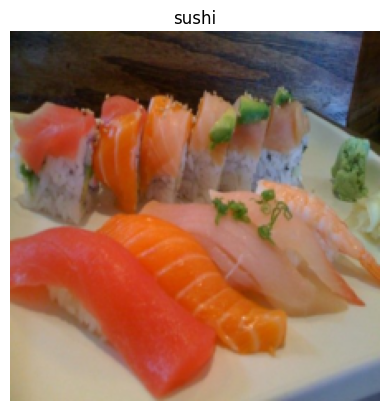

In [ ]:
# Plot the image with matplotlib
plt.imshow(image.permute(1,2,0))
plt.title(class_name[label])
plt.axis(False)

### ViT Overview

In [ ]:
'''
Figure 1: Visual overview of the architecture
Embedding = learnable represntations
Four equatins
Table 1
'''

'''
* ViT-Base , ViT-Large , ViT-Huge
* Layers - the number of transformer encoder layers
* Hidden size(D) - the embedding size throughout the architecture
* MLP size - the number of hidden units/neurons in the MLP
* Head - the number of multi-head self-attention
'''
# Equation 1 : Split data into patches and creating the class  , position and patch embedding.
# layers = input -> function -> output
# what's the output shape?
# Input shape: (224,224,3)
# output shape:
'''
Input image :
Ouput image :
H = height
W = width
C = colour channels
P = patch size
N = number of patches = (height * width) / p^2
D = constant latent vector size = embedding dimension(see Table 1)
'''


'\nInput image :\nOuput image :\nH = height\nW = width\nC = colour channels\nP = patch size\nN = number of patches = (height * width) / p^2\nD = constant latent vector size = embedding dimension(see Table 1)\n'

In [ ]:
# Create the example values
height = 224
width = 224
color_channels = 3
patch_size = 16

# Calculate the number of the patches
number_of_patches = int((height * width) / patch_size**2)
number_of_patches

196

In [ ]:
# Input shape
embedding_layer_input_shape = (height , width , color_channels)

# Output shape
embedding_layer_output_shape = (number_of_patches , patch_size ** 2 * color_channels)
embedding_layer_input_shape , embedding_layer_output_shape

((224, 224, 3), (196, 768))

In [ ]:
image.shape

torch.Size([3, 224, 224])

(np.float64(-0.5), np.float64(223.5), np.float64(15.5), np.float64(-0.5))

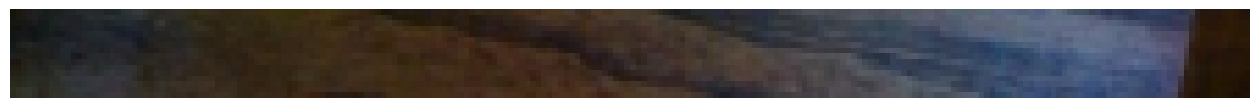

In [ ]:
# Get the top view of the image
image_permuted = image.permute(1,2,0) # [height , width , color_channels]

# Index to plot the top row of pixels
patch_size=16
plt.figure(figsize=(patch_size , patch_size))
plt.imshow(image_permuted[:patch_size, : , :])
plt.axis(False)

In [ ]:
image_permuted.shape

torch.Size([224, 224, 3])

In [ ]:
image_permuted[:patch_size,:,:].shape

torch.Size([16, 224, 3])

In [ ]:
image.shape[1] // patch_size

14

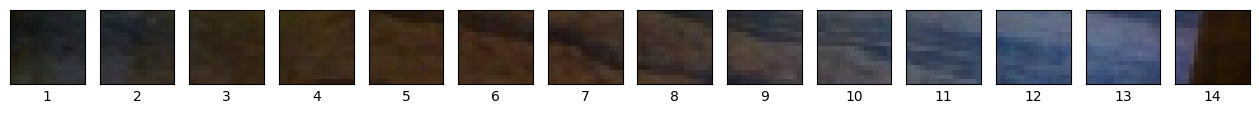

In [ ]:
# Code to show top row as patches
img_size = 224
patch_size = 16
num_patches = img_size // patch_size
assert img_size % patch_size == 0

# create a series of subplots
fig , axs = plt.subplots(
    nrows=1,
    ncols=img_size//patch_size,
    sharex=True,
    sharey=True,
    figsize=[patch_size , patch_size]
)
# Create a series of the patches
for i , patch in enumerate(range(0 , img_size , patch_size)):
  axs[i].imshow(image_permuted[:patch_size , patch:patch+patch_size , :])
  axs[i].set_xlabel(i+1) # set the patch label
  axs[i].set_xticks([])
  axs[i].set_yticks([])

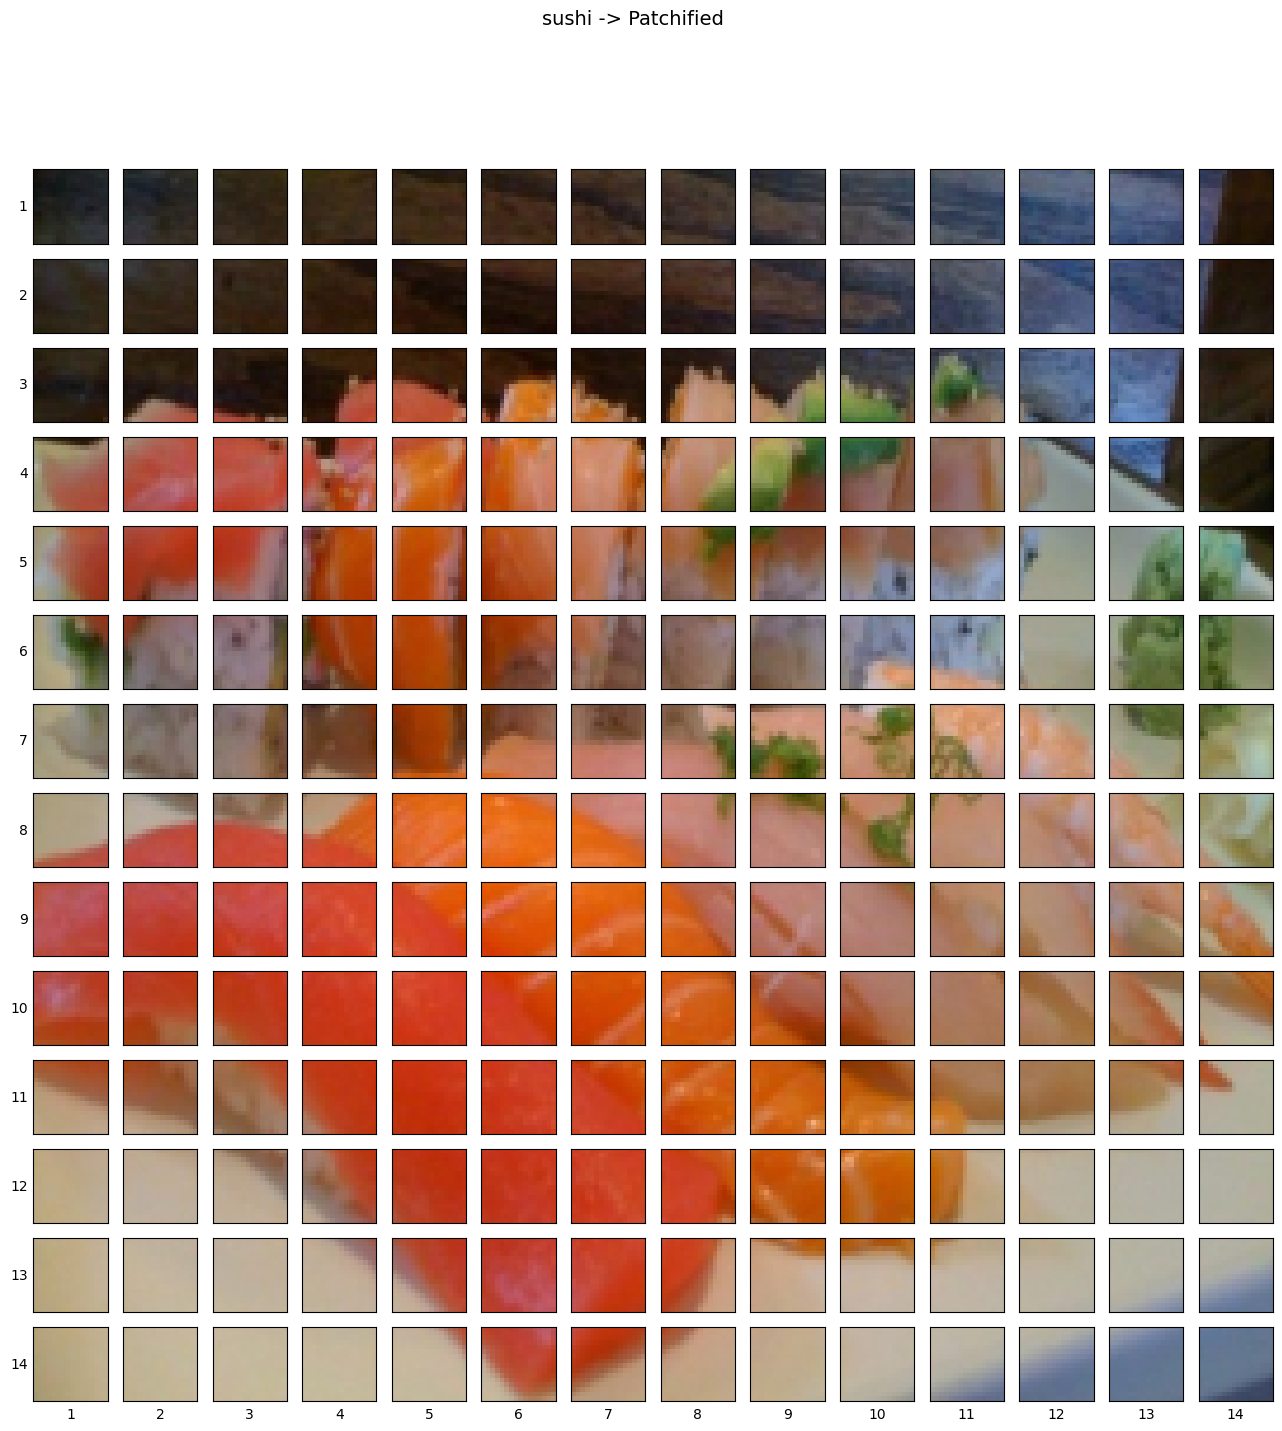

In [ ]:
# setup code to plot whole image as patches
img_size = 224
patch_size = 16
num_patches = img_size // patch_size
assert img_size % patch_size == 0

# create a series of subplots
fig , axs = plt.subplots(
    nrows=img_size//patch_size,
    ncols=img_size//patch_size,
    sharex=True,
    sharey=True,
    figsize=[patch_size , patch_size]
)

for i , patch_height in enumerate(range(0 , img_size , patch_size)):
  for j , patch_width in enumerate(range(0 , img_size , patch_size)):
    # plot the permuted image on the different axes
    axs[i , j].imshow(image_permuted[patch_height:patch_height+patch_size , patch_width:patch_width+patch_size , :])
    axs[i , j].set_ylabel(i+1,
                          rotation='horizontal',
                          horizontalalignment='right',
                          verticalalignment='center')
    axs[i , j].set_xlabel(j+1)
    axs[i , j].set_xticks([])
    axs[i , j].set_yticks([])
    axs[i , j].label_outer()

# Set up a little for the plot
fig.suptitle(f"{class_name[label]} -> Patchified" , fontsize=14)
plt.show()

#### Creating the embedding from each patches and position embedding along with class embedding

In [ ]:
# Creating embedding from each patches
# Perhapes we could create the image patches and image patch embedding of single step using torch.Conv2d()
# Create conv2d layer to turn image into patches of learnable feature maps
# Create a conv2d layer with hyperparameters from the ViT paper
patch_size = 16
conv2d = nn.Conv2d(
    in_channels=3,
    out_channels=768,
    kernel_size=patch_size,
    stride=patch_size,
    padding=0
)
conv2d

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

In [ ]:
image.unsqueeze(0)

tensor([[[[0.0863, 0.1020, 0.1137,  ..., 0.1608, 0.1373, 0.1216],
          [0.0784, 0.0980, 0.1098,  ..., 0.1647, 0.1451, 0.1333],
          [0.0824, 0.0863, 0.0863,  ..., 0.1686, 0.1608, 0.1529],
          ...,
          [0.6549, 0.6588, 0.6706,  ..., 0.2353, 0.2353, 0.2235],
          [0.6353, 0.6549, 0.6667,  ..., 0.2392, 0.2314, 0.2235],
          [0.6275, 0.6510, 0.6627,  ..., 0.2353, 0.2353, 0.2314]],

         [[0.0745, 0.0902, 0.0980,  ..., 0.0980, 0.0863, 0.0784],
          [0.0784, 0.0980, 0.1020,  ..., 0.0941, 0.0863, 0.0863],
          [0.0863, 0.0863, 0.0863,  ..., 0.1020, 0.0941, 0.0980],
          ...,
          [0.6118, 0.6039, 0.6078,  ..., 0.2824, 0.2784, 0.2706],
          [0.6000, 0.6078, 0.6118,  ..., 0.2784, 0.2706, 0.2627],
          [0.6000, 0.6118, 0.6157,  ..., 0.2745, 0.2745, 0.2706]],

         [[0.0353, 0.0627, 0.0902,  ..., 0.0314, 0.0353, 0.0353],
          [0.0431, 0.0706, 0.0941,  ..., 0.0314, 0.0353, 0.0392],
          [0.0588, 0.0667, 0.0824,  ..., 0

In [ ]:
# Pass the image through the convolutinal layer
image_out_of_conv = conv2d(image.unsqueeze(0))
image_out_of_conv.shape # [batch , embedding_dim , feature_map_heigth , feature_map_width]

torch.Size([1, 768, 14, 14])

Showing random convolutional feature maps from indexes: [348, 43, 168, 691, 63]


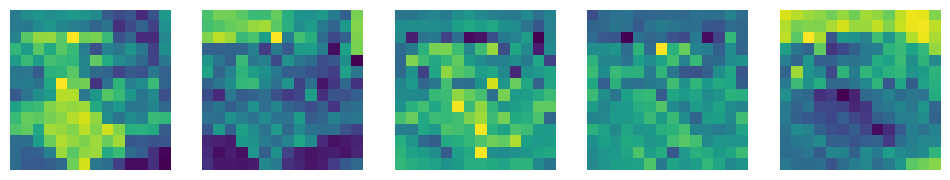

In [ ]:
# Plot random convolutional feature map
import random
random_indexs = random.sample(range(0,758) , k = 5)
print(f"Showing random convolutional feature maps from indexes: {random_indexs}")

# Create plot
fig , axs = plt.subplots(nrows=1 , ncols=5 , figsize=(12,12))

# plot random image feature map
for i , idx in enumerate(random_indexs):
  image_conv_feature_map = image_out_of_conv[0 , idx , : , :]
  axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
  axs[i].axis(False)

In [ ]:
# Get a single feature map in tensor form
single_feature_map = image_out_of_conv[: , 0 , : , :]
single_feature_map , single_feature_map.requires_grad

(tensor([[[0.1079, 0.1311, 0.1526, 0.1694, 0.1796, 0.1424, 0.1827, 0.2053,
           0.1810, 0.1802, 0.2096, 0.2623, 0.2955, 0.2154],
          [0.1560, 0.1645, 0.1472, 0.1554, 0.1286, 0.1372, 0.1711, 0.1896,
           0.1820, 0.1824, 0.2306, 0.2560, 0.2401, 0.1394],
          [0.1306, 0.0833, 0.1401, 0.1709, 0.2410, 0.1297, 0.2038, 0.1781,
           0.1473, 0.2066, 0.2017, 0.3262, 0.3184, 0.1096],
          [0.4355, 0.3908, 0.4575, 0.3862, 0.5298, 0.4113, 0.5000, 0.4476,
           0.3331, 0.2188, 0.3354, 0.3859, 0.3578, 0.1412],
          [0.3942, 0.3800, 0.3822, 0.2685, 0.4338, 0.3921, 0.4279, 0.3417,
           0.2925, 0.3576, 0.3508, 0.4271, 0.4212, 0.2839],
          [0.3865, 0.3275, 0.3706, 0.1856, 0.3873, 0.2762, 0.4447, 0.3436,
           0.3250, 0.3086, 0.4215, 0.4267, 0.4023, 0.2886],
          [0.4422, 0.3656, 0.3562, 0.2019, 0.2941, 0.3270, 0.3711, 0.3589,
           0.4027, 0.4194, 0.4868, 0.5049, 0.3948, 0.3156],
          [0.4758, 0.4888, 0.3528, 0.4889, 0.5042, 0.53

In [ ]:
image_out_of_conv.shape

torch.Size([1, 768, 14, 14])

#### Flatting the patch embedding

In [ ]:
# Right now we've a series of convolutional feature
# We want (batch_size , embedding , number of patches)
flatten_layer = nn.Flatten(start_dim=2,
                           end_dim=3)
flatten_layer(image_out_of_conv).shape

torch.Size([1, 768, 196])

Original image shape: torch.Size([3, 224, 224])
Image feature map (patches) shape: torch.Size([1, 768, 14, 14])
Flattened image feature map shape: tensor([[[ 0.1079,  0.1311,  0.1526,  ...,  0.4362,  0.3736,  0.3322],
         [ 0.1581,  0.1794,  0.1980,  ...,  0.5075,  0.4249,  0.2767],
         [-0.0121, -0.0296,  0.0226,  ...,  0.0182, -0.0742, -0.0841],
         ...,
         [ 0.0597,  0.0639,  0.1086,  ...,  0.5132,  0.3579,  0.3869],
         [-0.0210, -0.0132, -0.0361,  ..., -0.1248, -0.0349, -0.0702],
         [-0.0472, -0.0413, -0.0267,  ..., -0.1878, -0.2002, -0.1622]]],
       grad_fn=<ViewBackward0>)


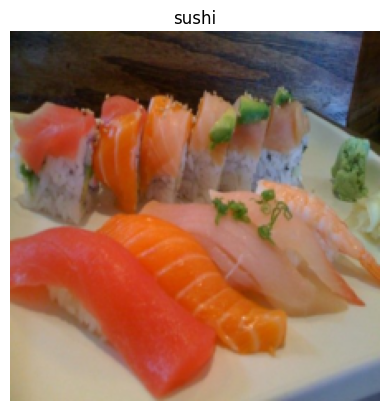

In [ ]:
plt.imshow(image.permute(1,2,0))
plt.title(class_name[label])
plt.axis(False)
print(f"Original image shape: {image.shape}")


# Turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0))
print(f"Image feature map (patches) shape: {image_out_of_conv.shape}")

# Flatten the feature maps
image_out_of_conv_flattened = flatten_layer(image_out_of_conv)
print(f"Flattened image feature map shape: {image_out_of_conv_flattened}")


In [ ]:
# Rearange output of flattened layer
image_out_of_conv_flattened_permuted = image_out_of_conv_flattened.permute(0,2,1)
image_out_of_conv_flattened_permuted.shape

torch.Size([1, 196, 768])

In [ ]:
# Get a single flattened feature map
single_flattened_feature_map = image_out_of_conv_flattened_permuted[: , : , 0]


# Plot the flattened feature map visually
plt.figure(figsize=(22 , 22))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.axis(False)

(np.float64(-0.5), np.float64(195.5), np.float64(0.5), np.float64(-0.5))

# Turning the ViT patch embedding layer into a pytorch module

In [ ]:
'''
We want this module to do few things

1) Create a class called patchEmbedding that inherits from nn.Module.
2) Initialize with appropriate hyperparameters, such as channels , embedding dimnesion , patch size,
3) Create a layer to turn an image into embedding patches using nn.Conv2d()
4) Create a layer to flatten the feature maps of the output of the layer in 3.
5) Define a forward() that defines the forward computation.
6) Make sure the output shape of the layer reflects the required output shape of the patch embedding.
'''

'\nWe want this module to do few things\n\n1) Create a class called patchEmbedding that inherits from nn.Module.\n2) Initialize with appropriate hyperparameters, such as channels , embedding dimnesion , patch size,\n3) Create a layer to turn an image into embedding patches using nn.Conv2d()\n4) Create a layer to flatten the feature maps of the output of the layer in 3.\n5) Define a forward() that defines the forward computation.\n6) Make sure the output shape of the layer reflects the required output shape of the patch embedding.\n'

In [ ]:
# Create a class called PatchEmbedding
class PatchEmbedding(nn.Module):
  # Initialize of the layer with appropriate hyperparameters
  def __init__(self,
               in_channels:int=3,
               patch_size:int=16,
               embedding_dim:int=768):
    super().__init__()
    self.patch_size = patch_size
    # create a layer to turn an image into embedded patches
    self.patcher = nn.Conv2d(
        in_channels=in_channels,
        out_channels=embedding_dim,
        kernel_size=patch_size,
        stride=patch_size,
        padding=0
    )
    # Create a layer to flatten feature map output of conv2d
    self.flatten = nn.Flatten(start_dim=2,
                              end_dim=3)

  # Define a forward method to define the forward computation shape
  def forward(self , x):
    # create assertin to check that inputs are the corrects shape
    image_resolution = x.shape[-1]
    assert image_resolution % patch_size == 0

    # Perform the forward pass
    x_patched = self.patcher(x)
    x_flattened = self.flatten(x_patched)
    return x_flattened.permute(0 , 2 , 1)

In [ ]:
image.shape

torch.Size([3, 224, 224])

In [ ]:
set_seeds()

# create an instance of patch embedding layer
patchify = PatchEmbedding(
    in_channels=3,
    patch_size=16,
    embedding_dim=768
)

# Pass an intance of patch embedding layer
print(f"Input image size: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0))
print(f"Output image size: {patch_embedded_image.shape}")

Input image size: torch.Size([1, 3, 224, 224])
Output image size: torch.Size([1, 196, 768])


In [ ]:
# Try with some random image example
rand_image_tensor = torch.randn(1 , 3, 224 , 224)
rand_image_tensor_bad = torch.randn(1 , 3, 250 , 250)

In [ ]:
patch_embedded_image[0]

tensor([[-0.1661,  0.0681, -0.1045,  ...,  0.1329, -0.0554,  0.0544],
        [-0.1775,  0.0023, -0.0727,  ...,  0.1429, -0.0934,  0.0717],
        [-0.1785,  0.0079, -0.0661,  ...,  0.1385, -0.0987,  0.0730],
        ...,
        [-0.5354,  0.1593, -0.1425,  ...,  0.4114, -0.2804,  0.1525],
        [-0.4288,  0.1270, -0.1491,  ...,  0.4217, -0.2411,  0.1581],
        [-0.4155,  0.1048, -0.1095,  ...,  0.3332, -0.1929,  0.1475]],
       grad_fn=<SelectBackward0>)

In [ ]:
# Now to batch size and embedding dimesion
batch_size = patch_embedded_image.shape[0]
embedding_dim = patch_embedded_image.shape[-1]

batch_size , embedding_dim

(1, 768)

#### Create the class token embedding to the front of the patch embedding

In [ ]:
class_token = nn.Parameter(torch.ones(batch_size , 1 , embedding_dim))
class_token.shape

torch.Size([1, 1, 768])

In [ ]:
class_token

Parameter containing:
tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 

In [ ]:
# Add the class token embedding to the front of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat((class_token , patch_embedded_image) , dim=1)
print(patch_embedded_image_with_class_embedding)
print(patch_embedded_image_with_class_embedding.shape)

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.1661,  0.0681, -0.1045,  ...,  0.1329, -0.0554,  0.0544],
         [-0.1775,  0.0023, -0.0727,  ...,  0.1429, -0.0934,  0.0717],
         ...,
         [-0.5354,  0.1593, -0.1425,  ...,  0.4114, -0.2804,  0.1525],
         [-0.4288,  0.1270, -0.1491,  ...,  0.4217, -0.2411,  0.1581],
         [-0.4155,  0.1048, -0.1095,  ...,  0.3332, -0.1929,  0.1475]]],
       grad_fn=<CatBackward0>)
torch.Size([1, 197, 768])


In [ ]:
patch_embedded_image[0].shape

torch.Size([196, 768])

In [ ]:
patch_embedded_image_with_class_embedding[0].shape

torch.Size([197, 768])

In [ ]:
# Now time to add the position embedding with patch embedding along with class embedding.
# Calculate N (number of patches)
number_of_patches = int(height  * width) // patch_size ** 2

# Get the embedding dimension
embedding_dim = patch_embedded_image_with_class_embedding.shape[-1]

# create the learnalble 1D position embedding
position_embedding = nn.Parameter(torch.ones(1 , number_of_patches+1 , embedding_dim) , requires_grad=True)
position_embedding.shape , position_embedding

(torch.Size([1, 197, 768]),
 Parameter containing:
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]], requires_grad=True))

In [ ]:
# Add the position embedding to the patch and class embedding
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding

patch_and_position_embedding.shape , patch_and_position_embedding

(torch.Size([1, 197, 768]),
 tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
          [0.8339, 1.0681, 0.8955,  ..., 1.1329, 0.9446, 1.0544],
          [0.8225, 1.0023, 0.9273,  ..., 1.1429, 0.9066, 1.0717],
          ...,
          [0.4646, 1.1593, 0.8575,  ..., 1.4114, 0.7196, 1.1525],
          [0.5712, 1.1270, 0.8509,  ..., 1.4217, 0.7589, 1.1581],
          [0.5845, 1.1048, 0.8905,  ..., 1.3332, 0.8071, 1.1475]]],
        grad_fn=<AddBackward0>))

In [ ]:
# Putting it all together from imaga to embedding
set_seeds()

# set patch size
patch_size = 16

# Print shape of the original image and get the image dimension
print(f"image tensor shape: {image.shape}")
height , width = image.shape[1] , image.shape[2]

# get image tensor and add a batch dimension
x = image.unsqueeze(0)
print(f"input image shape: {x.shape}")

# create patch  embedding layer
patch_embedding_layer = PatchEmbedding(in_channels=3,
                                        patch_size=patch_size,
                                        embedding_dim=768)

# pass input through patchembedding layer
patch_embedding = patch_embedding_layer(x)
print(f"patch embedding shape: {patch_embedding.shape}")

# class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size , 1 , embedding_dimension),
                           requires_grad=True)

print(f'Class token shape: {class_token.shape}')

# prepend the class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token , patch_embedding),dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")

# create position embedding
number_of_patches = int((height * width) / patch_size ** 2)
position_embedding = nn.Parameter(torch.ones(1 , number_of_patches+1 , embedding_dimension) , requires_grad=True)

# Add the position embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch embedding with class token and position embedding shape: {patch_and_position_embedding.shape}")

image tensor shape: torch.Size([3, 224, 224])
input image shape: torch.Size([1, 3, 224, 224])
patch embedding shape: torch.Size([1, 196, 768])
Class token shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch embedding with class token and position embedding shape: torch.Size([1, 197, 768])


### MultiHeadSelfAttention

In [ ]:
# Create a class that inherits from nn.Module
class MultiheadSelfAttentionBlock(nn.Module):
  """
  Creates a multi-head self-attention block ("MSA" block for short)
  """
  # Initialize the class with hyperparameters from table 1
  def __init__(self,
               embedding_dim:int=768,
               num_heads:int=12,
               attn_dropout:float=0):
    super().__init__()
    # Create the norm layer (LN)
    self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

    # Create the multi-head attention (MSA) layer
    self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                num_heads=num_heads,
                                                dropout=attn_dropout,
                                                batch_first=True)

  # Create a forward() method to pass the data through the layers
  def forward(self , x):
    x = self.layer_norm(x)
    attn_output , _ = self.multihead_attn(query=x, # query embedding
                                      key=x,   # key embedding
                                      value=x, # value embedding
                                      need_weights=False)
    return attn_output # Here return only tensor , not return tuple


In [ ]:
# Create an instance of MSABlock
multihead_self_attention_block = MultiheadSelfAttentionBlock(embedding_dim=768, # from Table 1
                                                             num_heads=12) # from Table 1

# Pass patch and position image embedding through MSABlock
patched_image_through_msa_block = multihead_self_attention_block(patch_and_position_embedding)
print(f"Input shape of MSA block: {patch_and_position_embedding.shape}")
print(f"Output shape MSA block: {patched_image_through_msa_block[0].shape}")

Input shape of MSA block: torch.Size([1, 197, 768])
Output shape MSA block: torch.Size([197, 768])


In [ ]:
patched_image_through_msa_block

tensor([[[-0.2211, -0.2628,  0.0790,  ..., -0.4349,  0.9106, -0.4790],
         [-0.2102, -0.2591,  0.0846,  ..., -0.4226,  0.9168, -0.5011],
         [-0.2046, -0.2538,  0.0802,  ..., -0.4250,  0.9203, -0.5002],
         ...,
         [-0.2048, -0.2554,  0.0756,  ..., -0.4244,  0.9220, -0.5025],
         [-0.2063, -0.2516,  0.0793,  ..., -0.4260,  0.9211, -0.5005],
         [-0.2060, -0.2530,  0.0772,  ..., -0.4254,  0.9220, -0.5009]]],
       grad_fn=<TransposeBackward0>)

### MLP Block

In [ ]:
# Replicating the equation like MLP block
'''
MLP: A quite broad term for a layer wit a series of layer , layers can be multiple or even only one hidden layer.
Layer: Fully connected, dense , linear , feed-forward neural network layer.
GELU non linearity
Dropout: Regularization technique , applied every dense layer or fully connected layers
'''

# Creating a class that inherits from nn.Module
class MLPBlock(nn.Module):
  # Create a layer normalized multilayer perceptron block
  def __init__(self,
               embedding_dim:int=768, # Hidden size D from table 1 for ViT-Base
               mlp_size:int=3072, # MLP size from table 1 ViT-Base
               dropout:float=0.1): # Dropout from table 3 for ViT-Base
    super().__init__()

    # Create the norm layer (LN)
    self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

    # create the multilayer perceptron (MLP) layer(s)
    self.mlp = nn.Sequential(
        nn.Linear(in_features=embedding_dim,
                  out_features=mlp_size),
        nn.GELU(),
        nn.Dropout(p=dropout),
        nn.Linear(in_features=mlp_size,
                  out_features=embedding_dim),
        nn.Dropout(p=dropout)
    )
  # Create a forward() method to pass the data through the layers
  def forward(self , x):
    x = self.layer_norm(x)
    x = self.mlp(x)
    return x

In [ ]:
# Create an instance of MLPBlock
mlp_block = MLPBlock(embedding_dim=768,
                     mlp_size=3072,
                     dropout=0.1)
# Pass the output of the msa block to the mlp block
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block[0])
print(f'Dimension of output of the MSA block: {patched_image_through_msa_block[0].shape}')
print(f'Dimension of output of the MLP block: {patched_image_through_mlp_block.shape}')

Dimension of output of the MSA block: torch.Size([197, 768])
Dimension of output of the MLP block: torch.Size([197, 768])


In [ ]:
patched_image_through_msa_block[0]

tensor([[-0.2211, -0.2628,  0.0790,  ..., -0.4349,  0.9106, -0.4790],
        [-0.2102, -0.2591,  0.0846,  ..., -0.4226,  0.9168, -0.5011],
        [-0.2046, -0.2538,  0.0802,  ..., -0.4250,  0.9203, -0.5002],
        ...,
        [-0.2048, -0.2554,  0.0756,  ..., -0.4244,  0.9220, -0.5025],
        [-0.2063, -0.2516,  0.0793,  ..., -0.4260,  0.9211, -0.5005],
        [-0.2060, -0.2530,  0.0772,  ..., -0.4254,  0.9220, -0.5009]],
       grad_fn=<SelectBackward0>)

# Transformer Block

In [ ]:
# Create the transformer Encoder block
# Encoder: Turn a sequence into learnable representation
# Decoder: Output of the encoder
# Residual connections: Add layer input to its subsequent output,this enables the creation of deeper networks.

# Create the class that inherits the nn.Module
class TransformerEncoderBlock(nn.Module):
  """Create a transformer Encoder block"""
  def __init__(self ,
               embedding_dim:int=768,
               num_heads:int=12,
               mlp_size:int=3072,
               mlp_dropout:float=0.1,
               attn_dropout:float=0):
    super().__init__()
    # Create MSA block
    self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                 num_heads=num_heads,
                                                 attn_dropout=attn_dropout)

    # Create MLP block
    self.mlp_block = MLPBlock(embedding_dim=embedding_dim,
                              mlp_size=mlp_size,
                              dropout=mlp_dropout)

  # create a forward method
  def forward(self , x):
    if isinstance(x , tuple):
      x = x[0]
    # Create residual connections for MSA block (add the input to the output)
    x = self.msa_block(x) + x
    # Create residual connections for MLP block(add the input to the output)
    x = self.mlp_block(x) + x
    return x


In [ ]:
from torchinfo import summary

In [ ]:
# Create the instances of transformerencoderblock
transformer_encoder_block = TransformerEncoderBlock()

# get a summary using torchinfo.summary
summary(model = transformer_encoder_block,
        input_size=(1 , 197 , 768),
        col_names=['input_size','output_size','num_params','trainable'],
        col_width=20,
        row_settings=['var_names'])


Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

# ViT Model

In [ ]:
from re import X
# Putting all above method together and make the end to end ViT model
class ViT(nn.Module):
  def __init__(self,
               img_size:int=224,
               in_channels:int=3,
               patch_size:int=16,
               num_transfomer_layer:int=12,
               embedding_dim:int=768,
               mlp_size:int=3072,
               num_heads:int=12,
               attn_dropout:float=0,
               mlp_dropout:float=0.1,
               embedding_dropout:float=0.1,
               num_classes:int=1000):
    super().__init__()
    # make an assertion that the image size is compatible with the size
    assert img_size % patch_size == 0 , f"Image size must be divisible by patch size , image size: {img_size}"

    # calculate the number of the patches (height * width) // patch_size **2
    self.num_patches = (img_size * img_size) // patch_size ** 2

    # Create learnable class embedding
    self.class_embedding = nn.Parameter(torch.ones(1 , 1, embedding_dim),requires_grad=True)

    # Create learnable position embedding
    self.position_embedding = nn.Parameter(torch.ones(1 , self.num_patches + 1 , embedding_dim) , requires_grad=True)

    # create embedding dropout value
    self.embedding_dropout = nn.Dropout(p=embedding_dropout)

    # Create patch embedding layer
    self.patch_embedding_layer = PatchEmbedding(in_channels=in_channels,
                                                patch_size=patch_size,
                                                embedding_dim=embedding_dim)

    # Creating the transformer encoder block
    self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,num_heads=num_heads , mlp_size=mlp_size,mlp_dropout=mlp_dropout) for _ in range(num_transfomer_layer)])

    # Create the classification head
    self.classification_head = nn.Sequential(
        nn.LayerNorm(normalized_shape=embedding_dim),
        nn.Linear(in_features=embedding_dim,
                  out_features=num_classes)
    )

  def forward(self , x):
    # Get the batch size
    batch_size = x.shape[0]
    # Create class token embedding and expand it to match the batch size
    class_token = self.class_embedding.expand(batch_size , -1, -1)
    # Create the patch embedding
    x = self.patch_embedding_layer(x)
    # concat class token embedding and patch embedding
    x = torch.cat((class_token , x) , dim=1)
    # Add the position embedding with class and patch embedding
    x = self.position_embedding + x
    # Apply dropout to patch embedding
    x = self.embedding_dropout(x)
    # pass position and patch embedding to transform encoder
    x = self.transformer_encoder(x)
    # put 0th index logit through the classifier
    x = self.classification_head(x[:,0])
    return x


In [ ]:
# Create the instance of the ViT model class
vit = ViT()
vit

In [ ]:
set_seeds()
random_image_tensor = torch.randn(1 , 3 , 224 , 224)
vit = ViT(num_classes=len(class_name))
vit(random_image_tensor)

tensor([[ 0.0005, -0.3805,  0.0628]], grad_fn=<AddmmBackward0>)

In [ ]:
# get a summary using torchinfo.summary
summary(model = ViT(num_classes=1000),
        input_size=(1 , 3 , 224 , 224),
        col_names=['input_size','output_size','num_params','trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [1, 3, 224, 224]     [1, 1000]            152,064              True
├─PatchEmbedding (patch_embedding_layer)                     [1, 3, 224, 224]     [1, 196, 768]        --                   True
│    └─Conv2d (patcher)                                      [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
│    └─Flatten (flatten)                                     [1, 768, 14, 14]     [1, 768, 196]        --                   --
├─Dropout (embedding_dropout)                                [1, 197, 768]        [1, 197, 768]        --                   --
├─Sequential (transformer_encoder)                           [1, 197, 768]        [1, 197, 768]        --                   True
│    └─TransformerEncoderBlock (0)                           [1, 197, 768]        [1, 197, 768] 

# Set the optimizer and loss functions

In [ ]:
optimizer = torch.optim.Adam(vit.parameters(),
                             lr=1e-3,
                             betas=(0.9 , 0.999),
                             weight_decay=0.1)
# Loss function
loss_fn = nn.CrossEntropyLoss()
loss_fn , optimizer

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0.1
 ))

# Train ViT model

In [ ]:
results = train(model=vit,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                epochs=10,
                optimizer=optimizer,
                loss_fn=loss_fn,
                device=device)

 10%|█         | 1/10 [00:10<01:36, 10.67s/it]

Epoch: 1/10 | Train loss: 5.1087 | Train accuracy: 0.2852 | Test loss: 2.2339 | Test accuracy: 0.1979


 20%|██        | 2/10 [00:20<01:20, 10.06s/it]

Epoch: 2/10 | Train loss: 2.0448 | Train accuracy: 0.2930 | Test loss: 1.8042 | Test accuracy: 0.1979


 30%|███       | 3/10 [00:29<01:08,  9.76s/it]

Epoch: 3/10 | Train loss: 1.5490 | Train accuracy: 0.3008 | Test loss: 1.3043 | Test accuracy: 0.2604


 40%|████      | 4/10 [00:39<00:57,  9.66s/it]

Epoch: 4/10 | Train loss: 1.6574 | Train accuracy: 0.2891 | Test loss: 1.1568 | Test accuracy: 0.1979


 50%|█████     | 5/10 [00:48<00:48,  9.70s/it]

Epoch: 5/10 | Train loss: 1.3304 | Train accuracy: 0.2773 | Test loss: 1.2413 | Test accuracy: 0.1979


 60%|██████    | 6/10 [00:58<00:38,  9.72s/it]

Epoch: 6/10 | Train loss: 1.2466 | Train accuracy: 0.3125 | Test loss: 1.5126 | Test accuracy: 0.2604


 70%|███████   | 7/10 [01:08<00:29,  9.69s/it]

Epoch: 7/10 | Train loss: 1.2084 | Train accuracy: 0.4219 | Test loss: 3.0669 | Test accuracy: 0.1979


 80%|████████  | 8/10 [01:17<00:19,  9.57s/it]

Epoch: 8/10 | Train loss: 1.2489 | Train accuracy: 0.4180 | Test loss: 4.2806 | Test accuracy: 0.5417


 90%|█████████ | 9/10 [01:26<00:09,  9.48s/it]

Epoch: 9/10 | Train loss: 1.3128 | Train accuracy: 0.2500 | Test loss: 4.4253 | Test accuracy: 0.1979


100%|██████████| 10/10 [01:36<00:00,  9.63s/it]

Epoch: 10/10 | Train loss: 1.1851 | Train accuracy: 0.4062 | Test loss: 2.0938 | Test accuracy: 0.5417


In [ ]:
results

{'train_loss': [5.108673676848412,
  2.0447740703821182,
  1.5490239262580872,
  1.6573628038167953,
  1.3304306268692017,
  1.2465691566467285,
  1.2084430158138275,
  1.2488528341054916,
  1.3127666860818863,
  1.1850527301430702],
 'train_acc': [0.28515625,
  0.29296875,
  0.30078125,
  0.2890625,
  0.27734375,
  0.3125,
  0.421875,
  0.41796875,
  0.25,
  0.40625],
 'test_loss': [2.233917713165283,
  1.8042149543762207,
  1.3042924801508586,
  1.1568406224250793,
  1.2412854830423992,
  1.5125966866811116,
  3.066922386487325,
  4.28063101611527,
  4.425262212753296,
  2.093840935577949],
 'test_acc': [0.19791666666666666,
  0.19791666666666666,
  0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.2604166666666667,
  0.19791666666666666,
  0.5416666666666666,
  0.19791666666666666,
  0.5416666666666666]}

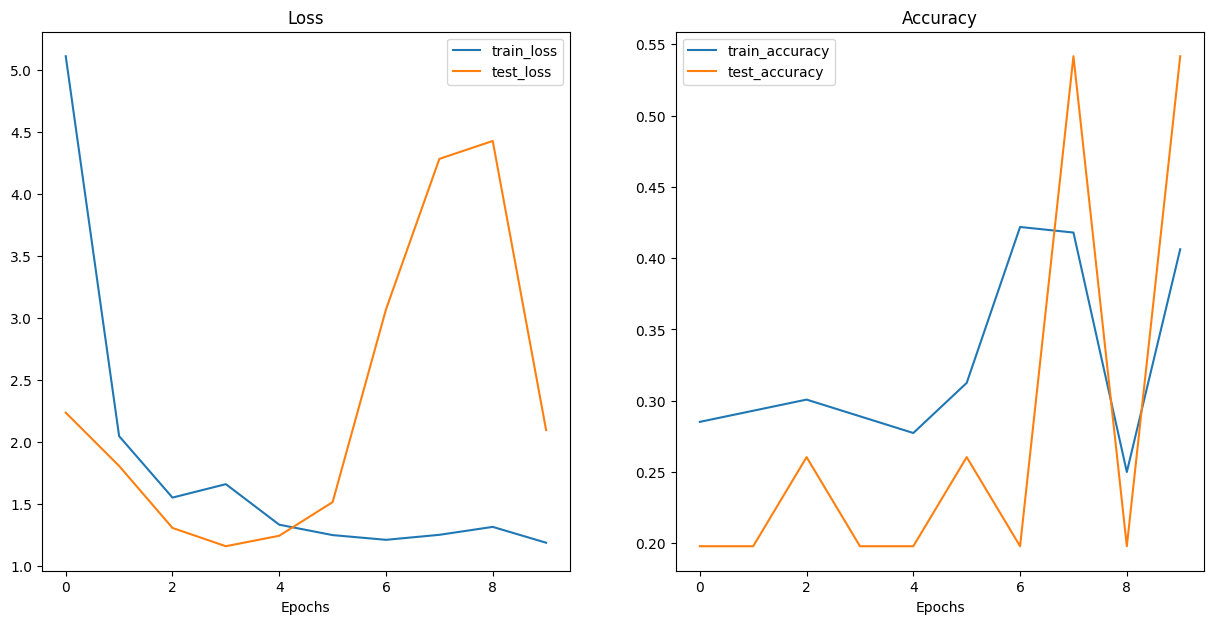

In [ ]:
plot_loss_curves(results) # Show the loss curves of the model and there performance metrics

# Save model of 54.17 accuracy on the test data

In [ ]:
save_model(model=vit,
           target_dir='models',
           model_name='save_vit_model.pth')

Saving model to: models/save_vit_model.pth


# Prediction

In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

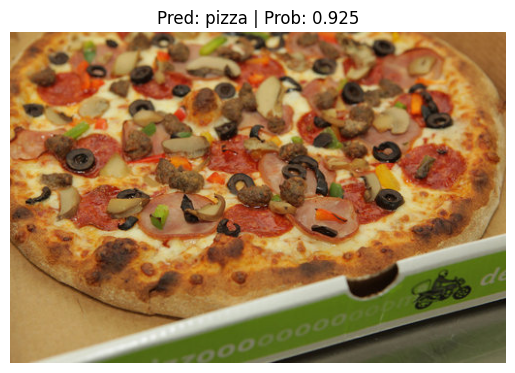

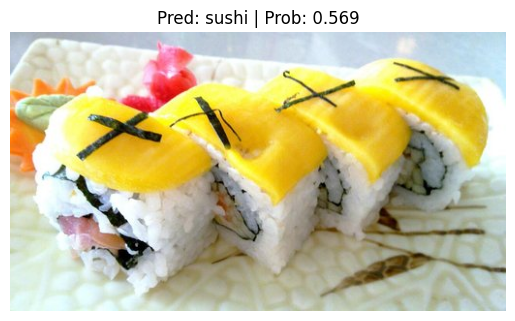

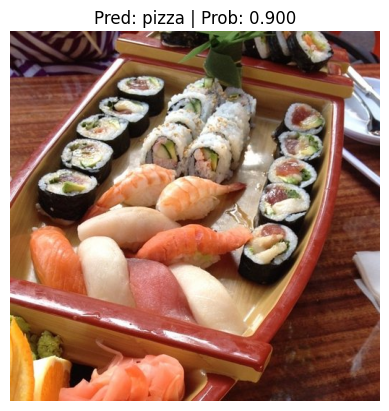

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=vit,
                        image_path=image_path,
                        class_names=class_name,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

# Making the prediction on the custom images

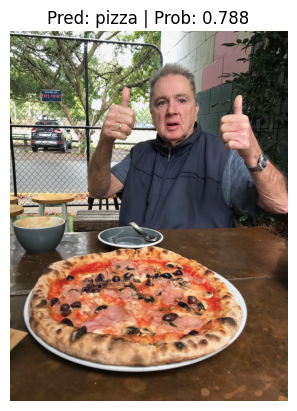

In [ ]:
from pathlib import Path
data_path = Path("data/")
# Download custom image
import requests
# Setup custom image path
custom_image_path = data_path / "/content/download.jpg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

# Predict on custom image
pred_and_plot_image(model=vit,
                    image_path=custom_image_path,
                    class_names=class_name)

In [ ]:
# Above images produced the bad performance
# It will like create the situation of the underfitting the model
'''
Focus on the enhancing data quality
Refining features,
Adjusting algorithms,
Optimizing hperparameters.
'''

'\nFocus on the enhancing data quality\nRefining features,\nAdjusting algorithms,\nOptimizing hperparameters.\n'

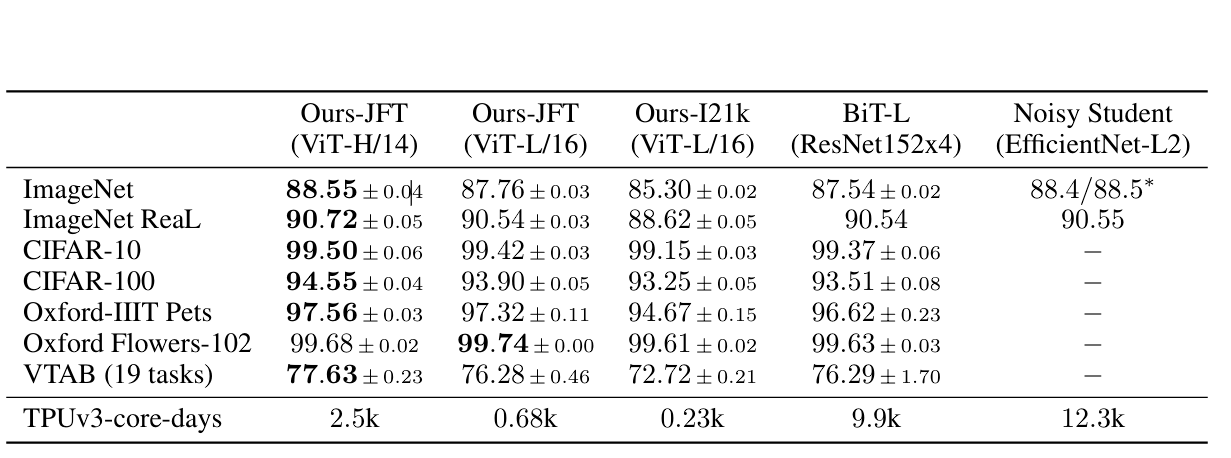

# Train on 101 BIG classes

In [ ]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet stats
                         std=[0.229, 0.224, 0.225])
])


In [ ]:
food_101_transform = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    transform
])

food_101_transform

Compose(
    TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
    Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
)

In [ ]:
data_dir = Path("bigdata")

# get the training data(750 * 101 classes)
train_data = datasets.Food101(root=data_dir,
                              split='train',
                              transform=food_101_transform,
                              download=True)

test_data = datasets.Food101(root=data_dir,
                             split='test',
                             transform=food_101_transform,
                             download=True)

100%|██████████| 5.00G/5.00G [03:38<00:00, 22.9MB/s]


In [ ]:
# Load the classes the image
food101_class_names = train_data.classes
# view the first 10
food101_class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
os.cpu_count()

2

In [ ]:
# Turning our food101 into dataloaders
#mainpath = Path('bigdata')
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'
BATCH_SIZE = 32

# Create food101 100% train_dataloader
train_dataloader_food101 = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

# Create food101 100% test_dataloader
test_dataloader_food101 = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

In [ ]:
len(train_dataloader_food101) , len(test_dataloader_food101)

(2368, 790)

In [ ]:
from pathlib import Path

# get the model size in bytes then convert to megabytes
vit_model_size = Path('models/save_vit_model.pth').stat().st_size / (1024 * 1024)
vit_model_size

327.3646297454834

In [ ]:
vit_101 = ViT(num_classes=101)
vit_101

ViT(
  (embedding_dropout): Dropout(p=0.1, inplace=False)
  (patch_embedding_layer): PatchEmbedding(
    (patcher): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (flatten): Flatten(start_dim=2, end_dim=3)
  )
  (transformer_encoder): Sequential(
    (0): TransformerEncoderBlock(
      (msa_block): MultiheadSelfAttentionBlock(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (multihead_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
      )
      (mlp_block): MLPBlock(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.1, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
  

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
from torchinfo import summary
summary(model=vit_101,
        input_size=(1, 3, 224, 224),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [1, 3, 224, 224]     [1, 101]             152,064              True
├─PatchEmbedding (patch_embedding_layer)                     [1, 3, 224, 224]     [1, 196, 768]        --                   True
│    └─Conv2d (patcher)                                      [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
│    └─Flatten (flatten)                                     [1, 768, 14, 14]     [1, 768, 196]        --                   --
├─Dropout (embedding_dropout)                                [1, 197, 768]        [1, 197, 768]        --                   --
├─Sequential (transformer_encoder)                           [1, 197, 768]        [1, 197, 768]        --                   True
│    └─TransformerEncoderBlock (0)                           [1, 197, 768]        [1, 197, 768] 

In [ ]:
device

'cuda'

# 7 hours to train the 85M parameter Vision Transformer on 101k images for 10 epochs using a Tesla T4 GPU in Colab.

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = '1'
optimizer = torch.optim.Adam(vit.parameters(),
                             lr=1e-3,
                             betas=(0.9 , 0.999),
                             weight_decay=0.1)
# Loss function
loss_fn = nn.CrossEntropyLoss()

torch.manual_seed(42)

result_food101_vit_model = train(
    model=vit_101,
    train_dataloader=train_dataloader_food101,
    test_dataloader=test_dataloader_food101,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=10,
    device=device
)

 10%|█         | 1/10 [48:24<7:15:36, 2904.07s/it]

Epoch: 1/10 | Train loss: 4.7795 | Train accuracy: 0.0096 | Test loss: 4.7637 | Test accuracy: 0.0093
